## 特征增强：清洗数据
1. 识别数据中的缺失值
2. 删除有害数据
3. 填充缺失值
4. 对数据进行归一化、标准化

### 3.1 识别数据中的缺失值
#### 3.1.1 皮马印第安人糖尿病预测数据集
该数据集希望通过体检结果细节，预测21岁以上女性皮马印第安人5年内是否会患糖尿病。

#### 3.1.2 探索性数据分析

In [1]:
# 导入探索性数据分析所需的包
# 存储表格数据
import pandas as pd
# 数学计算包
import numpy as np
# 流行的数据可视化工具
import matplotlib.pyplot as plt
# 另一个数据可视化工具
import seaborn as sns
%matplotlib inline
# 流行的数据可视化主题
plt.style.use('fivethirtyeight')

In [2]:
# 使用Pandas导入数据
pima = pd.read_csv('../data/pima.data')
pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insuling', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']

pima = pd.read_csv('../data/pima.data', names=pima_column_names)

pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insuling,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 先算一下空准确率
pima['onset_diabetes'].value_counts(normalize=True)
# 空准确率，65%的人没有糖尿病

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

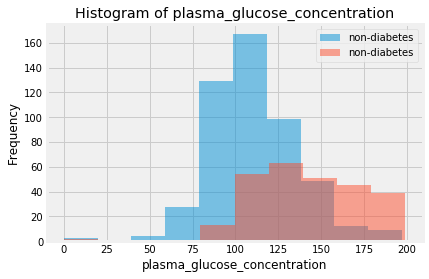

In [5]:
# 对糖尿病患者和健康人的区别进行可视化。希望直方图可以显示一些规律：
# 对plasma_glucose_concentration绘制两类的直方图
col = 'plasma_glucose_concentration'
plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='non-diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

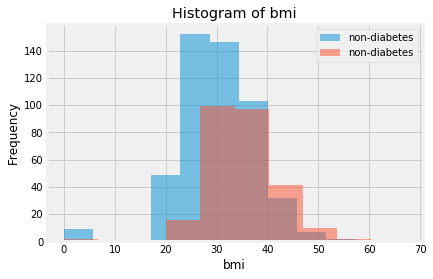

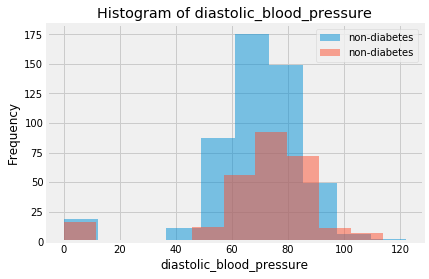

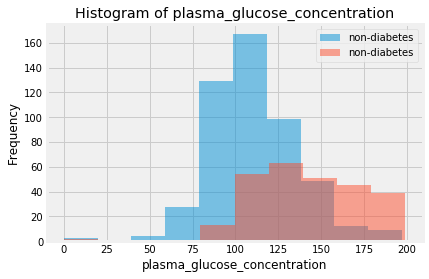

In [6]:
# 看起来患者和常人的血浆葡萄糖浓度有很大的差异。继续：
# 身体质量指数、舒张压和血浆葡萄糖浓度
for col in ['bmi', 'diastolic_blood_pressure', 'plasma_glucose_concentration']:
    plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
    plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='non-diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

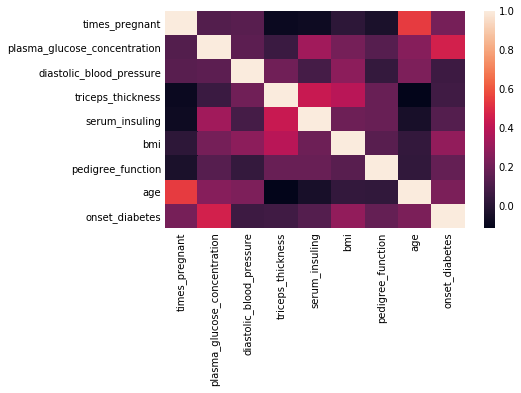

In [7]:
# 对于最终患有糖尿病的患者，其血浆葡萄糖浓度会有很大的增长，我们可以用线性相关矩阵来量化这些变量间的关系。用Seaborn作为可视化工具：
# 数据集相关矩阵的热力图：
sns.heatmap(pima.corr())

In [8]:
# 进一步研究onset_diabetes列的相关性数值：
pima.corr()['onset_diabetes']
# plasma_glucose_concentration 和 onset_diabetes有很强的相关性

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insuling                  0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, dtype: float64

In [9]:
# 数据是否有缺失值
pima.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insuling                  0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [10]:
# 数据的行数和列数
pima.shape

(768, 9)

In [11]:
# 基本的描述性统计
pima.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insuling,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


bmi的最小值是0，是有悖医学常识的，数据中缺失的或不存在的点都是用0填充的，下面列的最小值都是0：  
1. times_pregnant
2. plasma_glucose_concentration
3. diastolic_blood_pressure
4. triceps_thickness
5. serum_insuling
6. bmi
7. onset_diabetes  

因为怀孕次数和患糖尿病可以为0，其他列是用0填充的。

### 3.2 处理数据集中的缺失值
处理缺失值的最主要的两个方法：
1. 删除缺失值的行；
2. 填充缺失值。

In [12]:
# 被错误填充的缺失值是0
pima['serum_insuling'].isnull().sum()

0

In [13]:
# 用None手动替换
pima['serum_insuling'] = pima['serum_insuling'].map(lambda x: x if x != 0 else None)

In [14]:
# 检查缺失值数量
pima['serum_insuling'].isnull().sum()

374

In [15]:
# 直接对所有列操作，快一些
columns = ['serum_insuling', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness']

for col in columns:
    pima[col].replace([0], [None], inplace=True)

In [16]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insuling                  374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [17]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insuling,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,None,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [18]:
pima.describe()

,times_pregnant,serum_insuling,pedigree_function,age,onset_diabetes
count,768.000000,394.000000,768.000000,768.000000,768.000000
mean,3.845052,155.548223,0.471876,33.240885,0.348958
std,3.369578,118.775855,0.331329,11.760232,0.476951
min,0.000000,14.000000,0.078000,21.000000,0.000000
25%,1.000000,76.250000,0.243750,24.000000,0.000000
50%,3.000000,125.000000,0.372500,29.000000,0.000000
75%,6.000000,190.000000,0.626250,41.000000,1.000000
max,17.000000,846.000000,2.420000,81.000000,1.000000


In [19]:
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.6867627785059, 30.53564107280403)

#### 3.2.1 删除有害的行

In [20]:
# 删除存在缺失值的行
pima_dropped = pima.dropna()

In [21]:
num_rows_lost = round(100 * (pima.shape[0] - pima_dropped.shape[0])/float(pima.shape[0]))

In [22]:
print("retained {}% of rows".format(num_rows_lost))

retained 49% of rows


In [23]:
# 我们丢失了原始数据集中大约49%的行！
# 丢失缺失值前后的探索性数据分析

# 分成True和False两组
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [24]:
pima_dropped['onset_diabetes'].value_counts(normalize=True)

0    0.668367
1    0.331633
Name: onset_diabetes, dtype: float64

In [25]:
# 前后的True和False比例差不多，我们用pima.mean函数比较转换前后列的均值，看看数据形状：
# 每列的均值
pima.mean()

times_pregnant                    3.845052
plasma_glucose_concentration    121.686763
diastolic_blood_pressure         72.405184
triceps_thickness                29.153420
serum_insuling                  155.548223
bmi                              32.457464
pedigree_function                 0.471876
age                              33.240885
onset_diabetes                    0.348958
dtype: float64

In [26]:
pima_dropped.mean()

times_pregnant                    3.301020
plasma_glucose_concentration    122.627551
diastolic_blood_pressure         70.663265
triceps_thickness                29.145408
serum_insuling                  156.056122
bmi                              33.086224
pedigree_function                 0.523046
age                              30.864796
onset_diabetes                    0.331633
dtype: float64

In [27]:
(pima_dropped.mean() - pima.mean()) / pima.mean()

times_pregnant                 -0.141489
plasma_glucose_concentration    0.007731
diastolic_blood_pressure       -0.024058
triceps_thickness              -0.000275
serum_insuling                  0.003265
bmi                             0.019372
pedigree_function               0.108439
age                            -0.071481
onset_diabetes                 -0.049650
dtype: float64

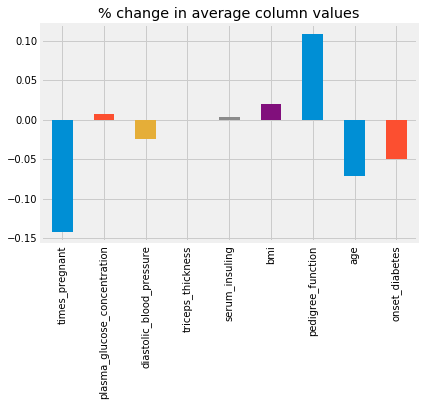

In [28]:
# 均值变化百分比条形图
((pima_dropped.mean() - pima.mean()) / pima.mean()).plot(kind='bar', title='% change in average column values')

怀孕次数（times_pregnant）和pedigree_function（糖尿病血系功能）变化很大，应该保留尽可能多的数据

In [29]:
# 开始机器学习

# 注意使用删除缺失值后的数据

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_dropped = pima_dropped.drop('onset_diabetes', axis=1)
# 删除响应变量，建立特征矩阵
print("learning from {} rows".format(X_dropped.shape[0]))
y_dropped = pima_dropped['onset_diabetes']

# 网格搜索所需的变量和实例

# 需要试验的KNN模型参数
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

knn = KNeighborsClassifier()  # 设置KNN模型

grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)

print(grid.best_score_, grid.best_params_)
# 但是我们只学习了很少的行

learning from 392 rows
0.75 {'n_neighbors': 8}


#### 3.2.2 填充缺失值

In [30]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insuling                  374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [31]:
# 填充血浆（plasma_glucose_concentration）列，将所有的None填充为plasma_glucose_concentration列其余的均值：
pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].mean(), inplace=True)

In [32]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insuling                  374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [33]:
# 这样做有点麻烦，我们用scikit-learn预处理类Imputer模块，称它为“填充器”
from sklearn.preprocessing import Imputer

# strategy这个参数可以调节如何填充缺失值
imputer = Imputer(strategy='mean')

pima_imputed = imputer.fit_transform(pima)
# 输出是numpy数组
print(type(pima_imputed))

pima_imputed = pd.DataFrame(pima_imputed, columns=pima_column_names)

# 注意triceps_thickness的缺失值被29.15342替代
pima_imputed.head()

<class 'numpy.ndarray'>


,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insuling,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [34]:
# 没有缺失值了
pima_imputed.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insuling                  0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [35]:
# 尝试填充一些别的值，看看对KNN的影响，首先用0替代所有缺失值：
pima_zero = pima.fillna(0)

X_zero = pima_zero.drop('onset_diabetes', axis=1)
print("learning from {} rows".format(X_zero.shape[0]))
y_zero = pima_zero['onset_diabetes']

knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
grid = GridSearchCV(knn, knn_params)
grid.fit(X_zero, y_zero)

print(grid.best_score_, grid.best_params_)

learning from 768 rows
0.7513020833333334 {'n_neighbors': 8}


#### 3.2.3 机器学习流水线中填充值
\* 如果在划分数据集和应用算法之前直接对整个数据集填充值，我们就是在**作弊**，模型学不到任何模式。

In [36]:
from sklearn.model_selection import train_test_split

X = pima[['serum_insuling']].copy()
y = pima['onset_diabetes'].copy()

X.isnull().sum()

serum_insuling    374
dtype: int64

In [37]:
# 不恰当的做法：在划分前填充值
entire_data_set_mean = X.mean()  # 取整个数据集的均值
X = X.fillna(entire_data_set_mean)
print(entire_data_set_mean)

serum_insuling    155.548223
dtype: float64


In [38]:
# 使用随机种子，使每次检查的划分都一样
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=224)

In [39]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

# 不恰当做法的准确率
knn.score(X_test, y_test)

0.625

当预测测试集的响应值时，我们的模型利用了测试集的信息以拟合训练集，违反了机器学习流程的核心原则。

In [40]:
# 恰当的做法，在划分后填充值
from sklearn.model_selection import train_test_split

X = pima[['serum_insuling']].copy()
y = pima['onset_diabetes'].copy()

X.isnull().sum()

serum_insuling    374
dtype: int64

In [41]:
# 使用相同的随机种子，保证划分不变
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=224)

In [42]:
# 不取整个X矩阵的均值，而是用训练集的均值填充训练集和测试集的缺失值：
training_mean = X_train.mean()
X_train = X_train.fillna(training_mean)
X_test = X_test.fillna(training_mean)

In [43]:
print(training_mean)

serum_insuling    154.106897
dtype: float64


In [44]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.6302083333333334

比之前的结果更真实，更能表示泛化能力。  
使用scikit-learn的Pipeline和Imputer搭建机器学习流水线。

In [45]:
from sklearn.pipeline import Pipeline

knn_params = {'classify__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

knn = KNeighborsClassifier()

mean_impute = Pipeline([('imputer', Imputer(strategy='mean')), ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7421875 {'classify__n_neighbors': 8}


In [46]:
# 改变填充策略，用中位数填充
knn_params = {'classify__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

knn = KNeighborsClassifier()

mean_impute = Pipeline([('imputer', Imputer(strategy='median')), ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7395833333333334 {'classify__n_neighbors': 8}


### 3.3 标准化和归一化

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BB5D470>,
      dtype=object)

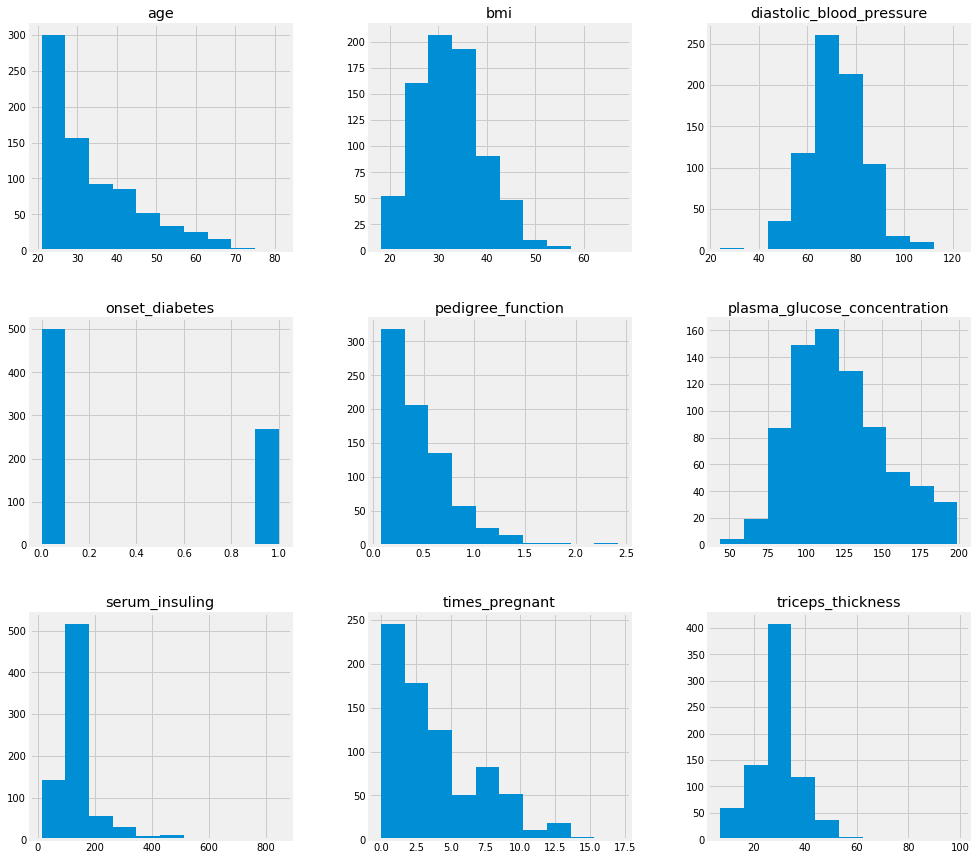

In [47]:
# 填充所有缺失值
impute = Imputer(strategy='mean')

pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima), columns=pima_column_names)
pima_imputed_mean.hist(figsize=(15, 15))

In [48]:
# 每列的均值、最小值、最大值和标准差差别很大。通过describe方法可以看到明显差别：
pima_imputed_mean.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insuling,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


这有什么关系呢？因为一些机器学习模型受数据尺度（scale）的影响很大。比如diastolic_blood_pressure的舒张压在24-122，但年龄是21-81，算法不会达到最优状态。我们可以通过sharex和sharey参数，在同一比例下查看每个图表：

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AD67B70>,
      dtype=object)

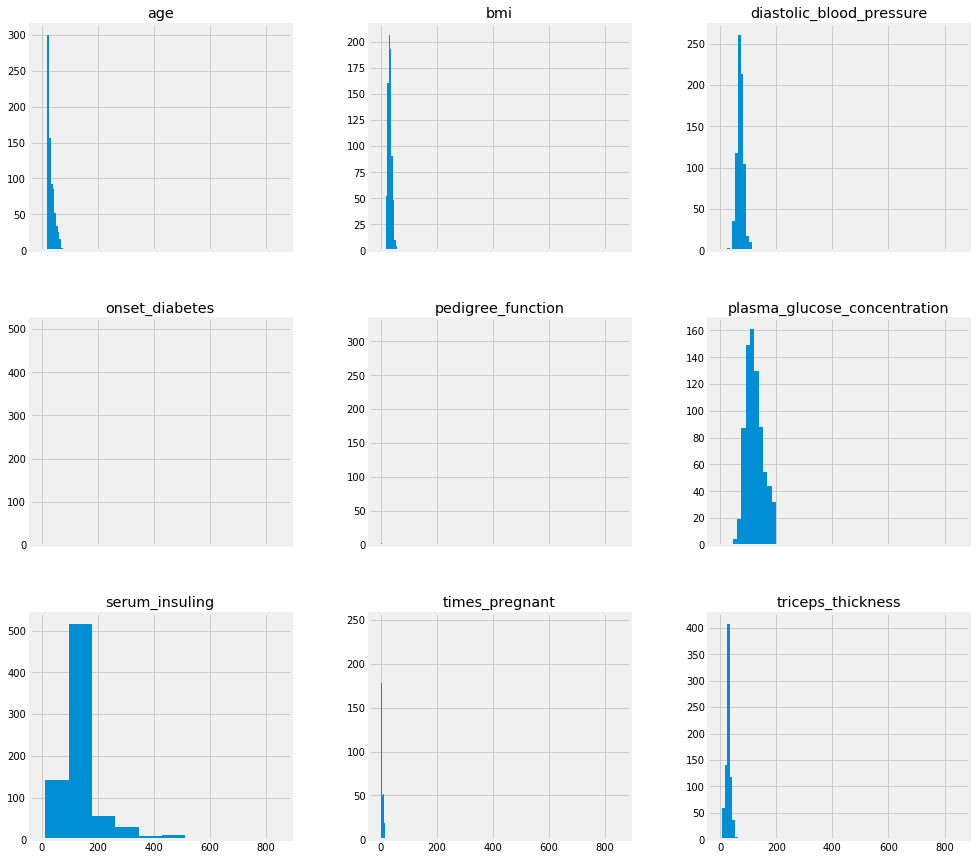

In [49]:
pima_imputed_mean.hist(figsize=(15, 15), sharex=True)

**归一化：**旨在将行和列对齐并转化为一致的规则。我们可以使用数学规则，例如所有列的均值和标准差必须相同，以便在同一直方图上显示。  
**标准化：**确保所有行和列在机器学习中得到平等对待，上数据处理保持一致。

#### 3.3.1 z分数标准化
**z分数标准化：**该方法将输出重新缩放到均值为0标准差为1。  
**公式：** z=(x-mu)/delta

In [50]:
# 内置的z分数归一化
from sklearn.preprocessing import StandardScaler

# z分数标准化前的均值和标准差
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.68676277850587, 30.43594886720766)

Text(0.5,1,'Distribution of plasma_glucose_concentration')

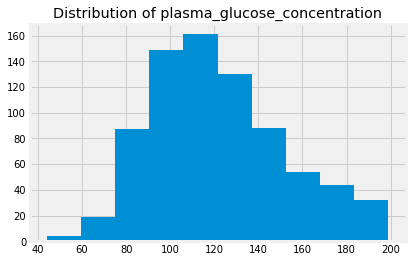

In [51]:
# 该处理前的分布情况
ax = pima['plasma_glucose_concentration'].hist()
ax.set_title('Distribution of plasma_glucose_concentration')

In [52]:
# z分数标准化
scaler = StandardScaler()

glucose_z_score_standardized = scaler.fit_transform(pima[['plasma_glucose_concentration']])

# 均值和标准差为1
glucose_z_score_standardized.mean(), glucose_z_score_standardized.std()

(-3.561965537339044e-16, 1.0)

Text(0.5,1,'Distribution of plasma_glucose_concentration after Z Score Scaling')

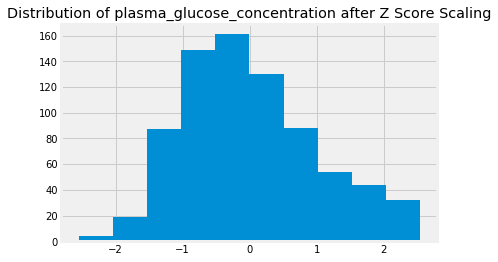

In [53]:
# reshape(-1)将矩阵拍平
ax = pd.Series(glucose_z_score_standardized.reshape(-1)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Z Score Scaling')

x轴更紧密了，y轴则没有变化。注意，数据的形状没有变化。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C25B668>,
      dtype=object)

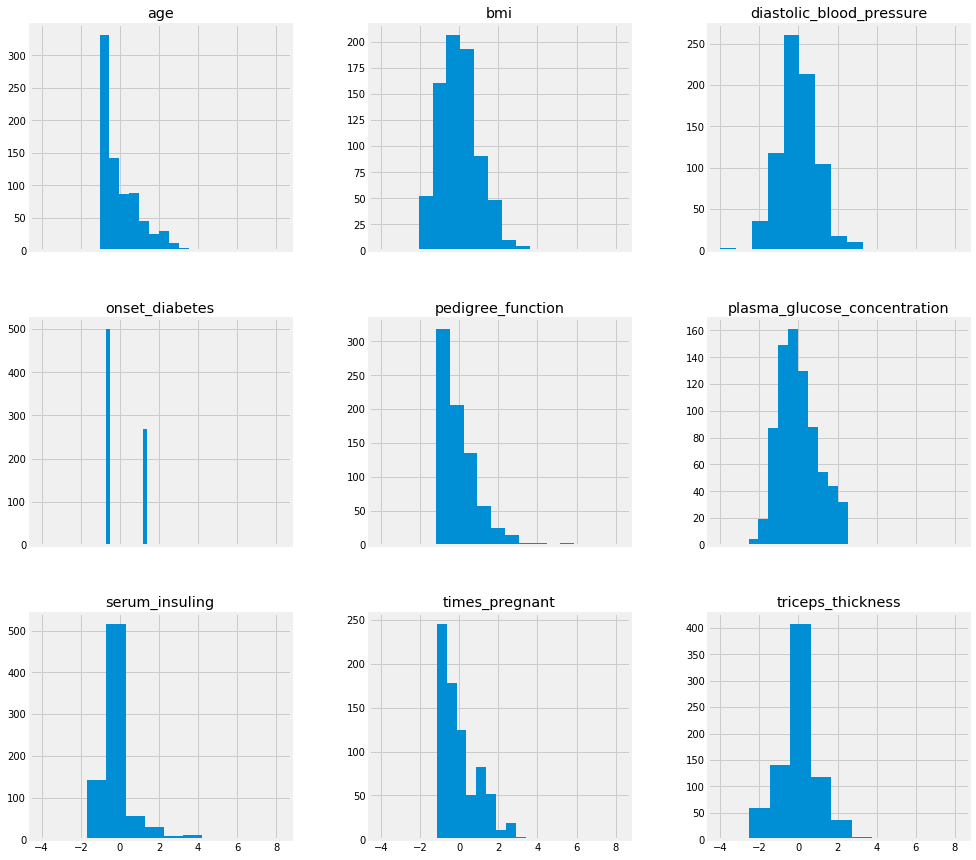

In [54]:
# StandardScaler会对每列单独计算均值和标准差：
scale = StandardScaler()  # 初始化一个z-scale对象

pima_imputed_mean_scaled = pd.DataFrame(scale.fit_transform(pima_imputed_mean), columns=pima_column_names)
pima_imputed_mean_scaled.hist(figsize=(15, 15), sharex=True)

In [55]:
# 现在将StandardScaler插入之前的机器学习流水线中：
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11]}

mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize', StandardScaler()), ('classify', knn)])

# drop不会改变原dataframe，除非inplace=True
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.75390625 {'classify__n_neighbors': 10, 'imputer__strategy': 'mean'}


#### 3.3.2 min-max标准化
**公式：**m=(x-xmin)/(xmax-xmin)

In [56]:
# 现在将MinMaxScaler插入之前的机器学习流水线中：
from sklearn.preprocessing import MinMaxScaler

# 实例化
min_max = MinMaxScaler()

knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11]}

mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize', MinMaxScaler()), ('classify', knn)])

# drop不会改变原dataframe，除非inplace=True
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7513020833333334 {'classify__n_neighbors': 8, 'imputer__strategy': 'mean'}


目前最好的是使用StandardScaler()归一化，使用10个邻居的K近邻算法。